# Hamiltonian

Describing the circuit using a time-dependent Hamiltonian. 
1. Capacitor term: $H_c = \frac{Q^2}{2C}$ where $Q$ is the charge operator
2. Inductor term: $H_i = \frac{\phi^2}{2L(t)}$ where $\phi$ is the flux operator and $L(t) = L_0 + L_psin(2\omega t)$ is the time-dependent inductance

Hence the Hamiltonian is:
$H(t) = H_c + H_i = \frac{Q^2}{2C} + \frac{\phi^2}{2L(t)}$


# Operators

To transfer this to Qutip, we need to define the operators. The operators are defined as functions that take a time argument and return the operator matrix.

\begin{equation}
\hat{Q} = \frac{i}{\sqrt{2}}(a - a^\dagger) \quad \quad
\hat{\phi} = \frac{i}{\sqrt{2}}(a + a^\dagger)
\end{equation}

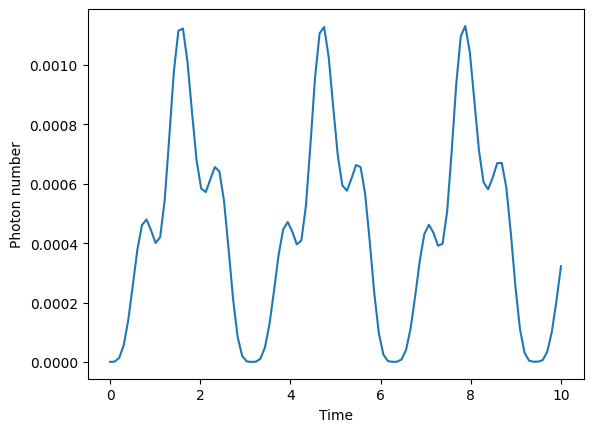

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
N = 10  # Dimension of Hilbert space
C = 1.0  # Capacitance
L0 = 1.0  # Constant inductance
Lp = 0.1  # Pumping amplitude
omega = 2.0  # Pumping frequency

# Define operators
a = destroy(N)  # Annihilation operator
Q = (1j / np.sqrt(2)) * (a - a.dag())  # Charge operator
Phi = (1 / np.sqrt(2)) * (a + a.dag())  # Flux operator

# Time-dependent inductance function
def L_t(t, args):
    L0 = args['L0']
    Lp = args['Lp']
    omega = args['omega']
    return L0 + Lp * np.sin(2 * omega * t)

# Define the Hamiltonian
H_cap = Q**2 / (2 * C)  # Capacitor term (static)

# Define the time-dependent inductance part
H_inductor = Phi**2 / 2  # Inductor part without L(t)

# Define the time-dependent Hamiltonian
H = [H_cap, [H_inductor, lambda t, args: 1 / L_t(t, args)]]

# Define the initial state
psi0 = basis(N, 0)  # Vacuum state

# Time evolution
tlist = np.linspace(0, 10, 100)

# Solve the system
args = {'L0': L0, 'Lp': Lp, 'omega': omega}
result = mesolve(H, psi0, tlist, [], [a.dag() * a], args=args)

# Plot the results
plt.plot(tlist, result.expect[0])
plt.xlabel('Time')
plt.ylabel('Photon number')
plt.show()
